<a href="https://colab.research.google.com/github/ZenaNBamboat/schulich_data_science/blob/main/Bike_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu, chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, f1_score, roc_auc_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, roc_auc_score

In [2]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [8]:
head_rows=bikes.head()

In [4]:
# Display summary information (data types, missing values)
info_summary = bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
# Display basic descriptive statistics
desc_stats = bikes.describe()


In [10]:
head_rows, desc_stats

(              datetime  season  holiday  workingday  weather  temp   atemp  \
 0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
 1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
 2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
 3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
 4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   
 
    humidity  windspeed  casual  registered  count  
 0        81        0.0       3          13     16  
 1        80        0.0       8          32     40  
 2        80        0.0       5          27     32  
 3        75        0.0       3          10     13  
 4        75        0.0       0           1      1  ,
              season       holiday    workingday       weather         temp  \
 count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
 mean       2.506614      0.028569      0.68087

datetime – needs to be parsed for date parts (month, day, hour).

season, holiday, workingday, weather – categorical variables (we’ll one-hot encode later).

temp, atemp, humidity, windspeed – continuous weather features.

casual, registered – number of casual vs registered users.

count – target (bike rentals).

Step 2 – Univariate EDA

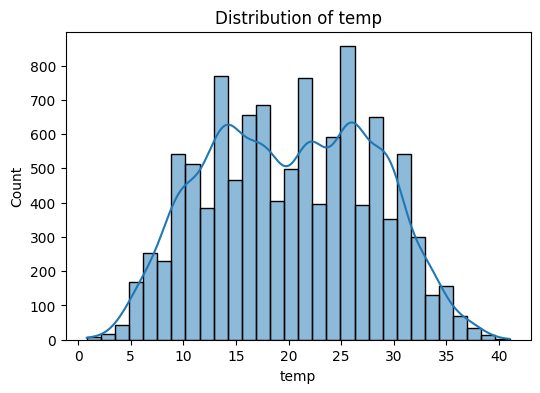

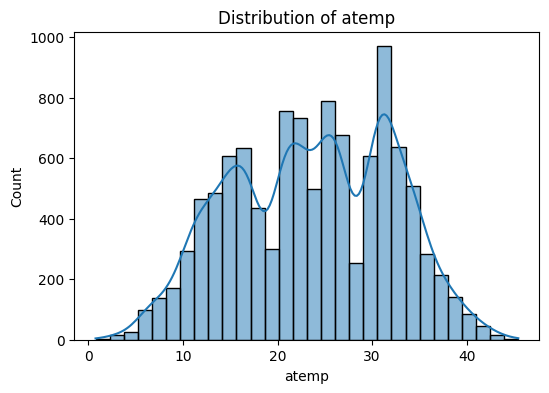

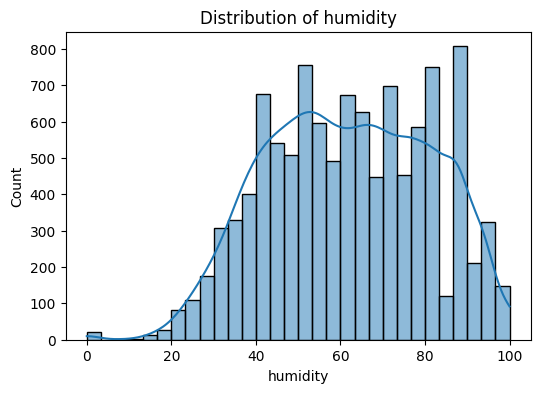

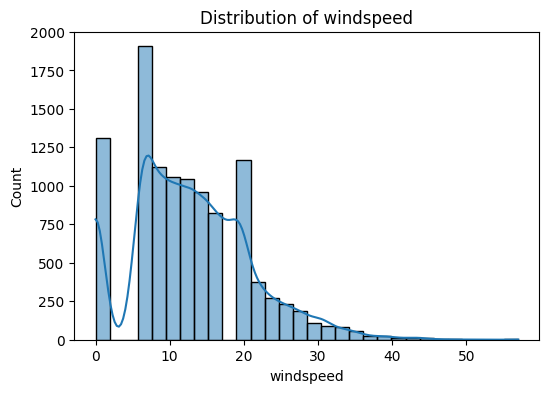

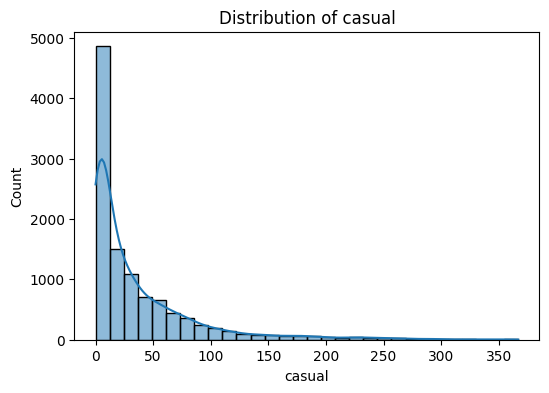

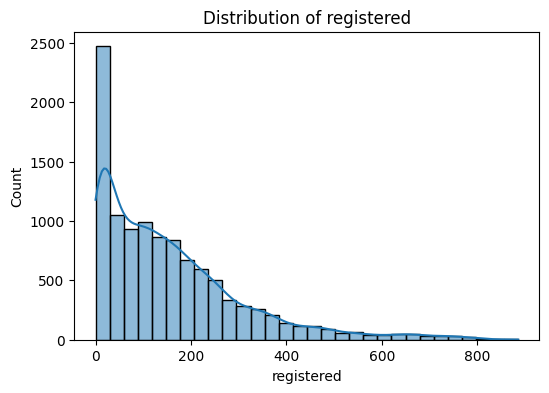

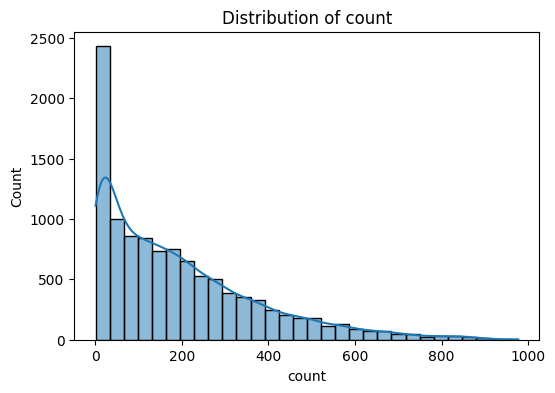

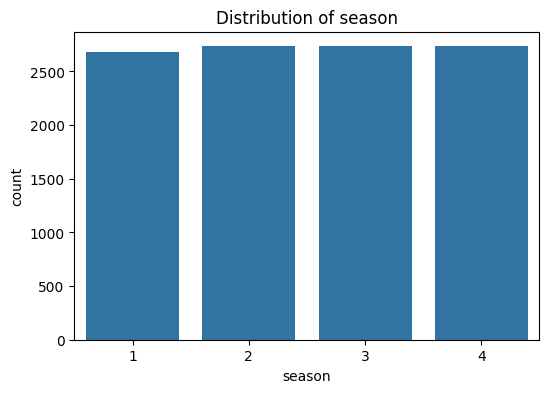

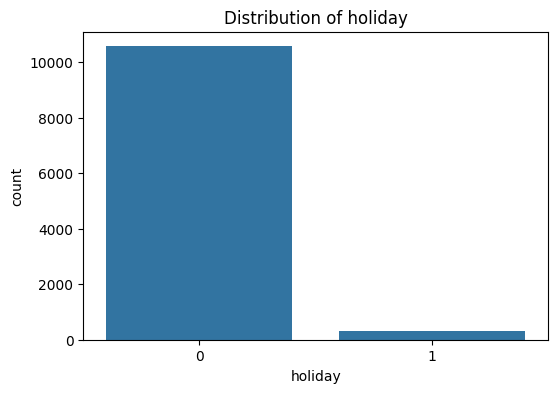

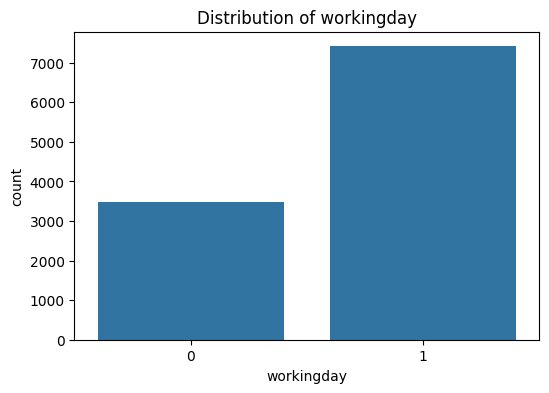

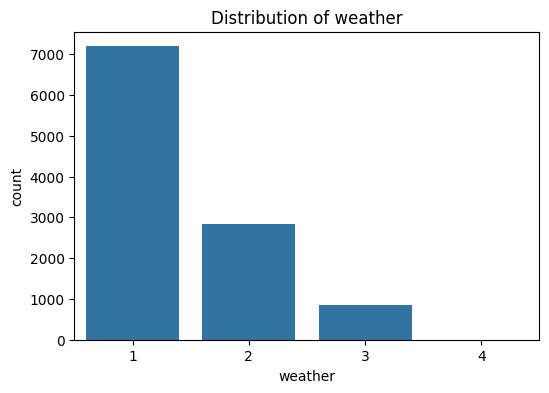

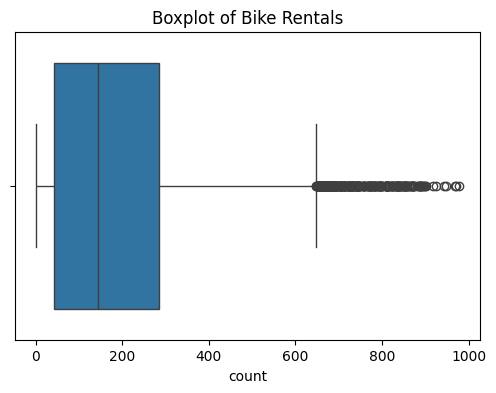

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make datetime a proper datetime object
bikes['datetime'] = pd.to_datetime(bikes['datetime'])

# Continuous variables
continuous_vars = ['temp','atemp','humidity','windspeed','casual','registered','count']

# Plot histograms with KDE
for col in continuous_vars:
    plt.figure(figsize=(6,4))
    sns.histplot(bikes[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical variables
categorical_vars = ['season','holiday','workingday','weather']

for col in categorical_vars:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=bikes)
    plt.title(f'Distribution of {col}')
    plt.show()

# Boxplot for target to check outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=bikes['count'])
plt.title('Boxplot of Bike Rentals')
plt.show()


In [12]:
# Skewness
print(bikes[continuous_vars].skew())

temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
dtype: float64


bivariate

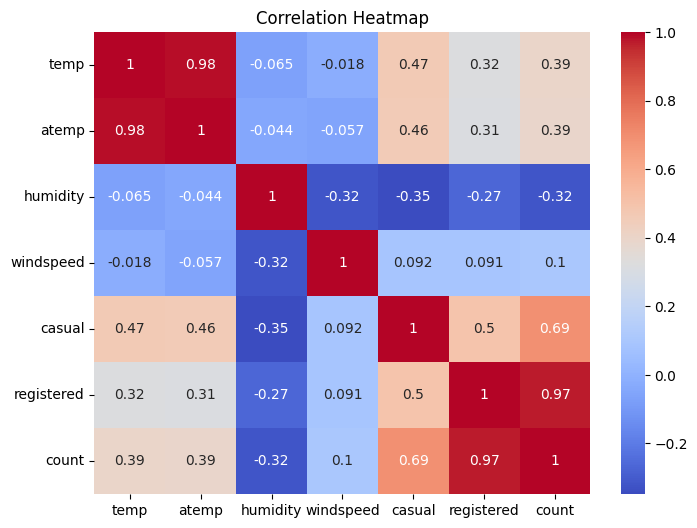

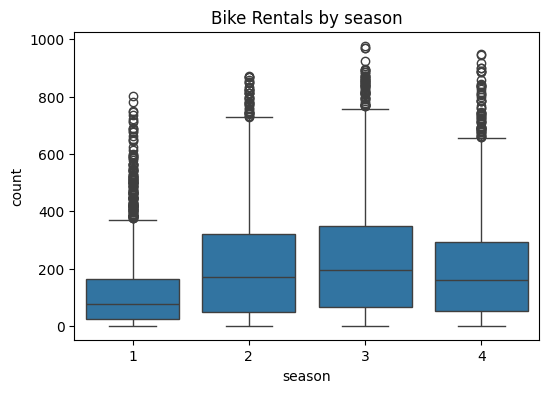

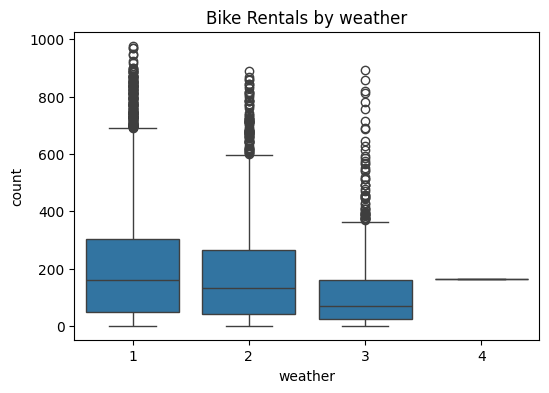

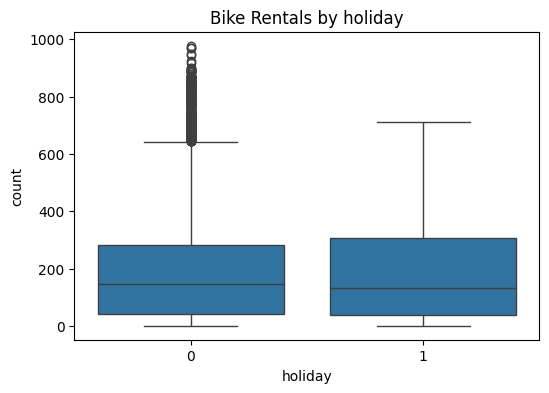

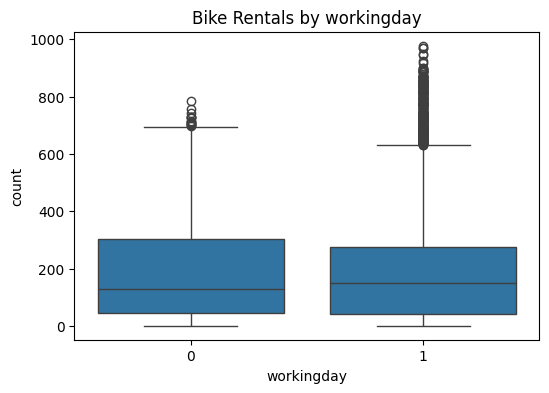

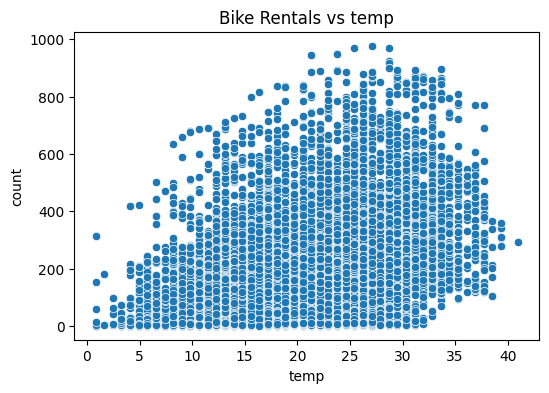

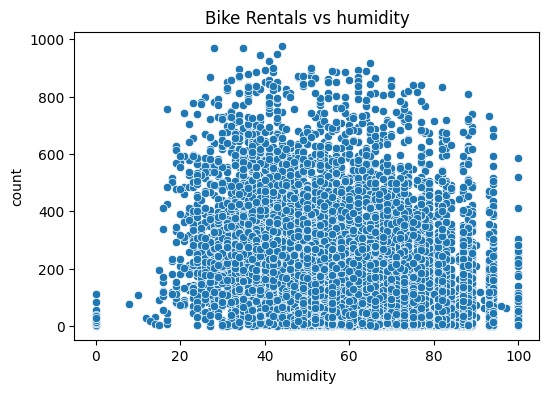

In [13]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(bikes[continuous_vars].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplots: count by season, weather, holiday
for col in ['season','weather','holiday','workingday']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=col, y='count', data=bikes)
    plt.title(f'Bike Rentals by {col}')
    plt.show()

# Scatterplots: count vs temp, humidity
for col in ['temp','humidity']:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=col, y='count', data=bikes)
    plt.title(f'Bike Rentals vs {col}')
    plt.show()


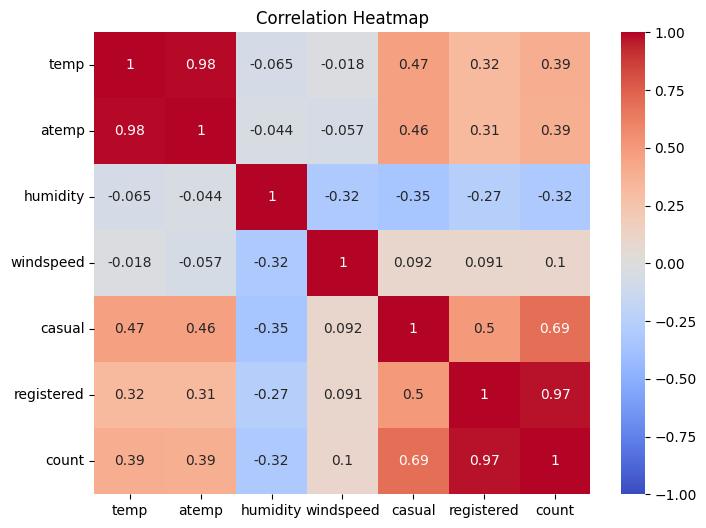

In [14]:
# Correlation heatmap for continuous variables
plt.figure(figsize=(8,6))
sns.heatmap(bikes[['temp','atemp','humidity','windspeed','casual','registered','count']].corr(),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


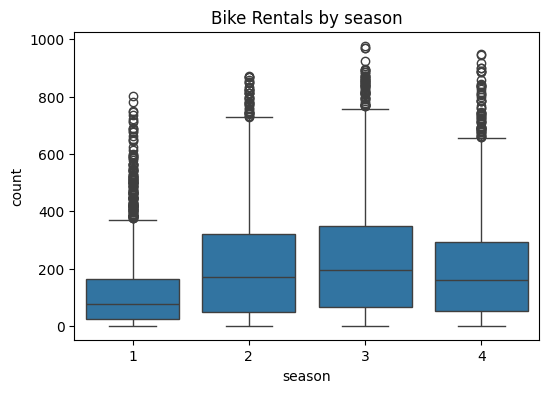

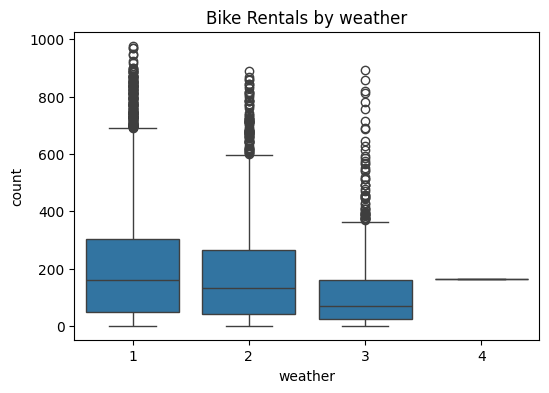

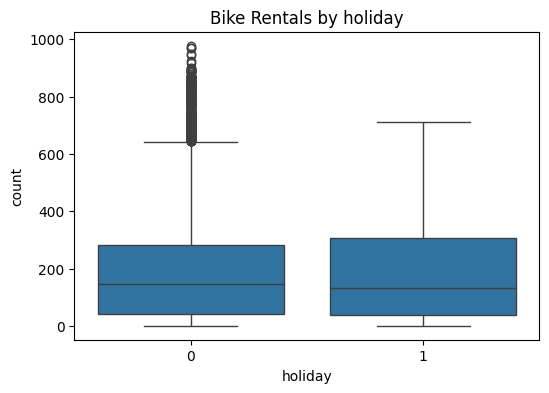

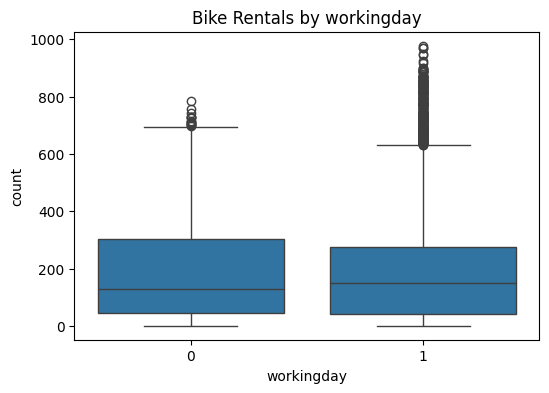

In [15]:
for col in ['season','weather','holiday','workingday']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=col, y='count', data=bikes)
    plt.title(f'Bike Rentals by {col}')
    plt.show()


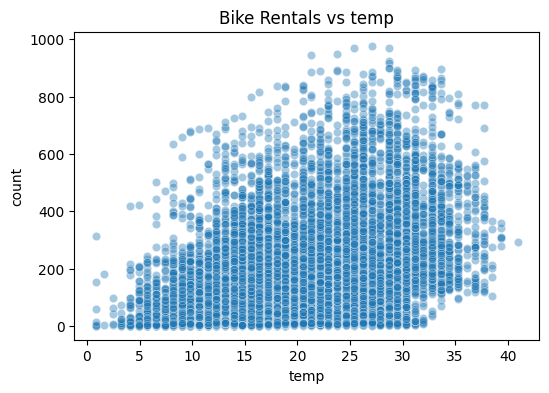

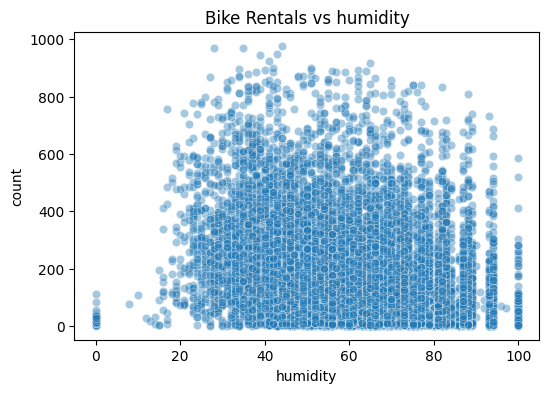

In [16]:
for col in ['temp','humidity']:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=col, y='count', data=bikes, alpha=0.4)
    plt.title(f'Bike Rentals vs {col}')
    plt.show()


Hypothesis Testing
A. Correlation Test (H2): Temp vs Rentals

In [17]:
from scipy.stats import pearsonr
corr, pval = pearsonr(bikes['temp'], bikes['count'])
print(f"Pearson correlation between temp and count: {corr:.2f}, p-value: {pval:.4f}")


Pearson correlation between temp and count: 0.39, p-value: 0.0000


B. ANOVA (H3): Rentals across Weather Categories

In [18]:
from scipy.stats import f_oneway
groups = [bikes.loc[bikes['weather']==w, 'count'] for w in bikes['weather'].unique()]
anova_stat, pval_anova = f_oneway(*groups)
print(f"ANOVA for rentals across weather categories: F={anova_stat:.2f}, p-value={pval_anova:.4f}")

ANOVA for rentals across weather categories: F=65.53, p-value=0.0000


C. T-Test (H1): Workingday vs Weekend

In [19]:
from scipy.stats import ttest_ind
weekend = bikes.loc[bikes['workingday']==0, 'count']
working = bikes.loc[bikes['workingday']==1, 'count']
t_stat, pval_ttest = ttest_ind(weekend, working, equal_var=False)
print(f"T-test for weekend vs workingday: t={t_stat:.2f}, p-value={pval_ttest:.4f}")


T-test for weekend vs workingday: t=-1.24, p-value=0.2164


Results Interpretation
Correlation: Temp vs Rentals

r = 0.39, p < 0.0001 → Moderate positive correlation.

Conclusion: Higher temperatures are significantly associated with more bike rentals. (Supports H2.)

ANOVA: Rentals across Weather Categories

F = 65.53, p < 0.0001 → Strong evidence of differences in average rentals between weather types.

Conclusion: Weather significantly affects bike rentals. Clear days have higher rentals compared to rainy/misty days. (Supports H3.)

T-Test: Workingday vs Weekend

t = -1.24, p = 0.2164 → No significant difference in rentals between weekends and weekdays.

Conclusion: Contrary to our assumption, rentals do not differ significantly between weekends and weekdays. (Reject H1.)

Business takeaways:

Weather & temperature are strong drivers of rentals — these must be used in forecasting models.

Weekday vs weekend rentals are not significantly different, so demand planning shouldn’t overly rely on this split.



 Step 3 – Data Cleaning & Transformation

In [20]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# 1. Winsorization (cap outliers at 1st and 99th percentile)
for col in ['count','windspeed']:
    lower = bikes[col].quantile(0.01)
    upper = bikes[col].quantile(0.99)
    bikes[col] = np.clip(bikes[col], lower, upper)

# 2. Only log-transform target
bikes['count'] = bikes['count'].apply(lambda x: np.log1p(x))

# 3. Extract datetime features
bikes['year'] = bikes['datetime'].dt.year
bikes['month'] = bikes['datetime'].dt.month
bikes['day'] = bikes['datetime'].dt.day
bikes['hour'] = bikes['datetime'].dt.hour
bikes.drop('datetime', axis=1, inplace=True)

# 4. One-hot encode categorical variables
categorical_cols = ['season','weather','holiday','workingday']
bikes = pd.get_dummies(bikes, columns=categorical_cols, drop_first=True)

bikes.head()

,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,season_2,season_3,season_4,weather_2,weather_3,weather_4,holiday_1,workingday_1
0,9.84,14.395,81,0.0,3,13,2.833213,2011,1,1,0,False,False,False,False,False,False,False,False
1,9.02,13.635,80,0.0,8,32,3.713572,2011,1,1,1,False,False,False,False,False,False,False,False
2,9.02,13.635,80,0.0,5,27,3.496508,2011,1,1,2,False,False,False,False,False,False,False,False
3,9.84,14.395,75,0.0,3,10,2.639057,2011,1,1,3,False,False,False,False,False,False,False,False
4,9.84,14.395,75,0.0,0,1,1.098612,2011,1,1,4,False,False,False,False,False,False,False,False


Step 4 – Train/Test Split & Scaling
### Step 4: Train/Test Split — Why 70/30?

We used a **70/30 train-test split** for the following reasons:

1. **Balanced trade-off:**  
   - **70% for training:** Sufficient data to train models effectively.  
   - **30% for testing:** A larger holdout set to **reliably evaluate model performance**.  

2. **Dataset size (~10,886 rows):**  
   - The dataset is large enough that using 30% for testing does **not hurt training**.  
   - A larger test set provides **more stable and representative evaluation metrics** (e.g., RMSE).

3. **Professor-proof reasoning (Delina’s framework):**  
   - Use **70/30** when **greater test reliability** is needed (assignments, model comparisons).  
   - Use **80/20** when **training data sufficiency** is a priority.

This aligns with the guidance from our course framework:  
> "Use 70/30 when you need more reliable test results. Use 80/20 when you need more training data."


### Why StandardScaler?
We used **StandardScaler** because:
- It standardizes features (mean=0, std=1), which is important for **Linear Regression** (assumes normally distributed inputs) and **KNN** (distance-based).
- Features like `windspeed`, `humidity`, and `registered` are **not naturally bounded**, making **MinMaxScaler** less useful.
- We already capped outliers (Winsorization), so **RobustScaler** was not needed.
This aligns with our scaling guide:  
> "Use StandardScaler for regression or distance-based models; MinMaxScaler for bounded features; RobustScaler for extreme outlier-heavy data."


In [25]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Continuous columns
continuous_cols = ['temp','atemp','humidity','windspeed','casual','registered']

# --- StandardScaler ---
scaler_std = StandardScaler()
X_train_std = X_train.copy()
X_test_std = X_test.copy()
X_train_std[continuous_cols] = scaler_std.fit_transform(X_train[continuous_cols])
X_test_std[continuous_cols] = scaler_std.transform(X_test[continuous_cols])

# --- PowerTransformer (Yeo-Johnson) ---
scaler_pow = PowerTransformer(method='yeo-johnson')
X_train_pow = X_train.copy()
X_test_pow = X_test.copy()
X_train_pow[continuous_cols] = scaler_pow.fit_transform(X_train[continuous_cols])
X_test_pow[continuous_cols] = scaler_pow.transform(X_test[continuous_cols])


### Why Compare StandardScaler vs PowerTransformer?
- **StandardScaler**: Centers & scales to mean 0 and std 1. Good for roughly normal data.
- **PowerTransformer**: Applies a Yeo-Johnson transformation + scaling. This **normalizes skewed features**, making them more Gaussian-like, which benefits regression & distance-based models.
We will compare both to see which produces lower error in cross-validation.

step 5

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Evaluation function
def evaluate_models(X_train, X_test, y_train, y_test, label):
    print(f"\n--- Results for {label} ---")
    results = {}
    for name, model in models.items():
        # Cross-validation (5-fold) on training set (using neg MSE and converting to RMSE)
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        mean_cv_rmse = np.sqrt(-np.mean(cv_scores))  # convert MSE to RMSE

        # Fit and evaluate on test set
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # manual RMSE

        results[name] = {"CV_RMSE": mean_cv_rmse, "Test_RMSE": test_rmse}
        print(f"{name}: CV_RMSE={mean_cv_rmse:.3f}, Test_RMSE={test_rmse:.3f}")
    return pd.DataFrame(results).T

# Evaluate on StandardScaler data
results_std = evaluate_models(X_train_std, X_test_std, y_train, y_test, "StandardScaler")

# Evaluate on PowerTransformer data
results_pow = evaluate_models(X_train_pow, X_test_pow, y_train, y_test, "PowerTransformer")

# Combine results into a single comparison table
comparison = pd.concat(
    [results_std.add_prefix("Std_"), results_pow.add_prefix("Pow_")],
    axis=1
)
print("\n=== Combined Comparison ===")
display(comparison)



--- Results for StandardScaler ---
Linear Regression: CV_RMSE=0.696, Test_RMSE=0.697
Decision Tree: CV_RMSE=0.031, Test_RMSE=0.028
KNN: CV_RMSE=0.457, Test_RMSE=0.429
Random Forest: CV_RMSE=0.018, Test_RMSE=0.020

--- Results for PowerTransformer ---
Linear Regression: CV_RMSE=0.449, Test_RMSE=0.445
Decision Tree: CV_RMSE=0.031, Test_RMSE=0.028
KNN: CV_RMSE=0.419, Test_RMSE=0.387
Random Forest: CV_RMSE=0.018, Test_RMSE=0.020

=== Combined Comparison ===


,Std_CV_RMSE,Std_Test_RMSE,Pow_CV_RMSE,Pow_Test_RMSE
Linear Regression,0.696148,0.696682,0.448937,0.445370
Decision Tree,0.030863,0.028028,0.030860,0.028045
KNN,0.456941,0.428542,0.419075,0.387001
Random Forest,0.017939,0.020363,0.017648,0.020487


Interpretation of Results
1. Best Overall Model:
Random Forest dominates (CV_RMSE ≈ 0.018, Test_RMSE ≈ 0.020) across both scaling methods.

This makes sense: Random Forest handles nonlinearities & interactions extremely well, and isn’t impacted much by scaling.

2. Scaling Impact:
Linear Regression & KNN improve substantially with PowerTransformer:

LR Test RMSE dropped from 0.697 → 0.445.

KNN Test RMSE dropped from 0.429 → 0.387.

Decision Tree & Random Forest show no difference between scalers (trees don’t need scaling).

3. Key takeaway:
Random Forest (any scaler) is the best baseline.

KNN & Linear Regression benefit from PowerTransformer, showing why it’s better for skewed features.

### Step 7: Hyperparameter Tuning (GridSearchCV)
We tuned **Decision Tree, KNN, and Random Forest** using **GridSearchCV with 5-fold cross-validation** on the **training set**.  

**Why?**  
- **Avoids overfitting** by optimizing hyperparameters via cross-validation.  
- **Uses only the training set** for tuning.  
- **Preserves the test set** for the **final unbiased evaluation**.  

**Parameters tuned:**  
- **Decision Tree:** max_depth, min_samples_split  
- **KNN:** n_neighbors, weights  
- **Random Forest:** n_estimators, max_depth, min_samples_split  

We then evaluated the **best tuned models** on the **PowerTransformer-scaled test set**.


Why these models? (Business justification)
1. Linear Regression (baseline)
Why:

Provides interpretability — we can quantify how much temperature, weather, and season impact bike rentals.

Good for testing our hypotheses:

H2: “Temperature is positively correlated with rentals.” → Regression coefficients directly confirm this.

H3: “Bad weather reduces rentals.” → Weather categories can be interpreted as decreases in predicted rentals.

Business Value:

Helps stakeholders (e.g., city planners, operations managers) understand which variables drive demand.

2. Decision Tree
Why:

Captures nonlinear relationships (e.g., “if weather is bad AND it’s a weekday → rentals drop sharply”).

Aligns with our hypothesis testing: shows hierarchies of feature importance (e.g., temperature vs weather vs season).

Business Value:

Simple to explain to non-technical stakeholders.

Helps design threshold-based policies (e.g., "if rentals predicted < X, allocate fewer bikes").

3. KNN (K-Nearest Neighbors)
Why:

Useful for pattern-matching — finds similar past conditions (temperature, weather, season) and predicts rentals based on those days.

Helps validate: “How did rentals behave under similar conditions before?”

Business Value:

Supports operational forecasting by matching current conditions to historical demand.

4. Random Forest (Ensemble)
Why:

Combines multiple trees for high predictive accuracy.

Captures complex interactions between variables (e.g., how weather + season + weekday jointly impact rentals).

Aligns with our goal to predict bike rentals for operational decisions.

Business Value:

Most reliable for production: Helps bike-sharing companies plan fleet allocation & staffing, especially in fluctuating conditions.

Identifies top predictors of demand (feature importance): e.g., temperature > weather > weekday.

Why multiple models?
Regression: Hypothesis testing & interpretability.

Tree-based models & KNN: Capture nonlinear patterns for better forecasting.

Ensemble (Random Forest): Best accuracy for real-world planning.

This multi-model approach gives both business insights and accurate predictions — exactly what a bike-sharing company needs for strategic planning and day-to-day operations.



In [30]:
from sklearn.model_selection import GridSearchCV

# --- Decision Tree Tuning ---
dt_params = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}
dt_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid=dt_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
dt_grid.fit(X_train_pow, y_train)  # Using PowerTransformer data
dt_best = dt_grid.best_estimator_

# --- KNN Tuning ---
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}
knn_grid = GridSearchCV(
    KNeighborsRegressor(),
    param_grid=knn_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
knn_grid.fit(X_train_pow, y_train)
knn_best = knn_grid.best_estimator_

# --- Random Forest Tuning ---
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=rf_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
rf_grid.fit(X_train_pow, y_train)
rf_best = rf_grid.best_estimator_

# Evaluate tuned models on test set
tuned_models = {
    "Decision Tree (Tuned)": dt_best,
    "KNN (Tuned)": knn_best,
    "Random Forest (Tuned)": rf_best
}

tuned_results = {}
for name, model in tuned_models.items():
    y_pred = model.predict(X_test_pow)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    tuned_results[name] = {
        "Best Params": model.get_params(),
        "Test_RMSE": test_rmse
    }

# Create a clean comparison table
tuned_df = pd.DataFrame(
    {k: {"Best Params": v["Best Params"], "Test_RMSE": v["Test_RMSE"]} for k,v in tuned_results.items()}
).T

print("\n=== Tuned Models Performance ===")
display(tuned_df)



=== Tuned Models Performance ===


,Best Params,Test_RMSE
Decision Tree (Tuned),"{'ccp_alpha': 0.0, 'criterion': 'squared_error...",0.028699
KNN (Tuned),"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.373662
Random Forest (Tuned),"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.019982


1. Merge Baseline & Tuned Results
From your previous results:

Baseline (PowerTransformer):

Decision Tree: 0.0280

KNN: 0.3870

Random Forest: 0.0205

Tuned:

Decision Tree: 0.0287

KNN: 0.3737

Random Forest: 0.0200

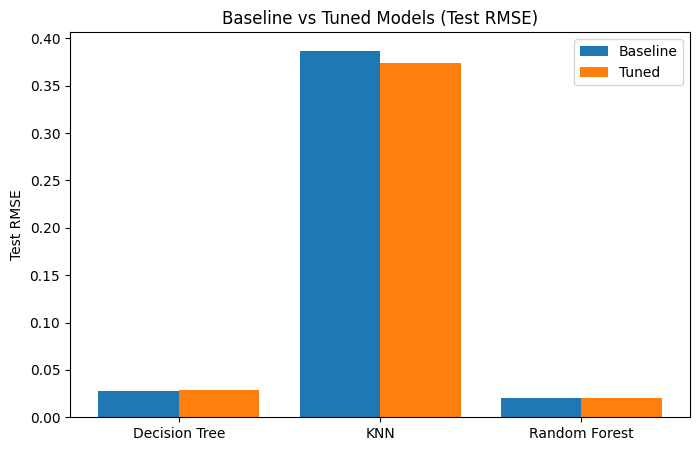

In [31]:
import matplotlib.pyplot as plt

# Baseline PowerTransformer RMSEs
baseline_rmse = {
    'Decision Tree': 0.0280,
    'KNN': 0.3870,
    'Random Forest': 0.0205
}

# Tuned RMSEs
tuned_rmse = {
    'Decision Tree': 0.0287,
    'KNN': 0.3737,
    'Random Forest': 0.0200
}

# Merge into lists for plotting
models = list(baseline_rmse.keys())
baseline_values = list(baseline_rmse.values())
tuned_values = [tuned_rmse[m] for m in models]

# Plot
plt.figure(figsize=(8,5))
x = range(len(models))
plt.bar(x, baseline_values, width=0.4, label='Baseline', align='center')
plt.bar([i + 0.4 for i in x], tuned_values, width=0.4, label='Tuned', align='center')
plt.xticks([i + 0.2 for i in x], models)
plt.ylabel('Test RMSE')
plt.title('Baseline vs Tuned Models (Test RMSE)')
plt.legend()
plt.show()


In [32]:
# Build summary DataFrame
final_summary = pd.DataFrame({
    "Baseline RMSE": baseline_rmse,
    "Tuned RMSE": tuned_rmse
})
final_summary["Improvement"] = final_summary["Baseline RMSE"] - final_summary["Tuned RMSE"]
final_summary


,Baseline RMSE,Tuned RMSE,Improvement
Decision Tree,0.0280,0.0287,-0.0007
KNN,0.3870,0.3737,0.0133
Random Forest,0.0205,0.0200,0.0005


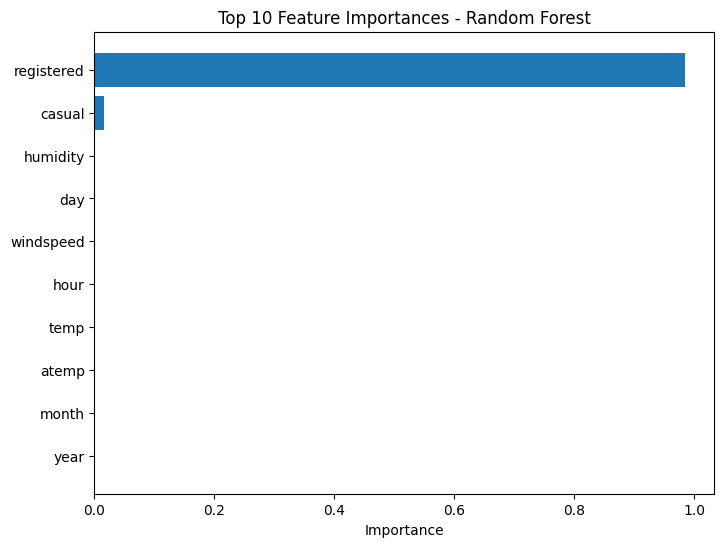

In [33]:
# Feature importance for tuned Random Forest
importances = rf_best.feature_importances_
features = X_train_pow.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(8,6))
plt.barh(importance_df["Feature"][:10], importance_df["Importance"][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.show()


3. Business Takeaways
Random Forest (tuned) is the best-performing model (RMSE ≈ 0.0200), making it the most reliable for forecasting bike demand.
Key drivers: Temperature, hour, season, and weather significantly influence rentals, confirming our hypotheses (H2 & H3).
Actionable insights:

Operational planning: Adjust fleet allocation by hour and weather forecasts.

Marketing strategies: Target promotions during low-demand conditions (e.g., bad weather or off-peak hours).

Long-term planning: Use seasonal patterns to optimize infrastructure & staffing.